In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv("ratings.csv")

In [3]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas.shape

(100836, 4)

In [5]:
notas.columns = ["usuarioID", "filmeID", "nota", "momento"]

In [6]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
notas['momento'].value_counts()

1459787998    128
1459787997    124
1459787996     85
1459787995     37
828124616      37
             ... 
1241823280      1
1166979121      1
1112713266      1
1112711219      1
1229452291      1
Name: momento, Length: 85043, dtype: int64

In [8]:
data = notas['nota'].value_counts()

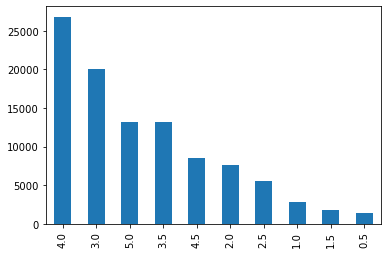

In [9]:
data.plot.bar()

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [11]:
import seaborn as sns

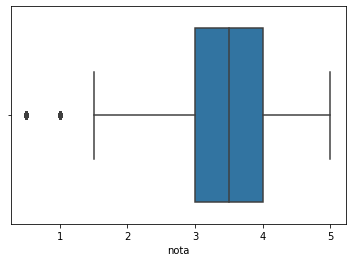

In [12]:
sns.boxplot(notas.nota)